In [1]:
import pandas as pd                      #Library for Processing; Organizing; and cleaning the data
import matplotlib.pyplot as plt          #Library for Grapical Analysis
from matplotlib.pyplot import rcParams
import numpy as np                       #Library for solving mathematical models
import random
import tensorflow as tf                 #Library for Neural Networks and Deep Learning
from tensorflow import keras
import collections                      #Library for collection of data(Tuples)
from collections import Counter
import os
import seaborn as sns                   #Library for Data Visualization 

from sklearn.model_selection import train_test_split      #Library for splitting the dataset
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression         #Library for the Linear model and its Regression
from sklearn import metrics
from sklearn.metrics import confusion_matrix              #For Confusion Matrix
from sklearn.metrics import classification_report         #For Classification metrics 
import statsmodels.api as sm

In [2]:
#Importing the data
houses = pd.read_csv(r'C:\Users\Kowshik Kumar B\Documents\HU\502\Project\houses.CSV ')  
#Accessing the first few rows of the "darksky" dataset.
houses.head() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,28


In [3]:
#Accessing the last few rows of the "darksky" dataset.
houses.tail() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,age
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,5
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,11
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,6


In [4]:
#Checking total number of NA values in each variable of the "darksky" dataset.
houses.isna().sum() 

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
age              0
dtype: int64

In [5]:
#Checking for the dimensions of the "darksky" dataset.
houses.shape

(21613, 16)

In [6]:
#Checking for datatypes of the variables in "darksky" dataset.
houses.dtypes 

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
age                int64
dtype: object

In [7]:
#Checking for Summary table of the "darksky" dataset.
houses.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,75000.0,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.0,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,290.0,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,520.0,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


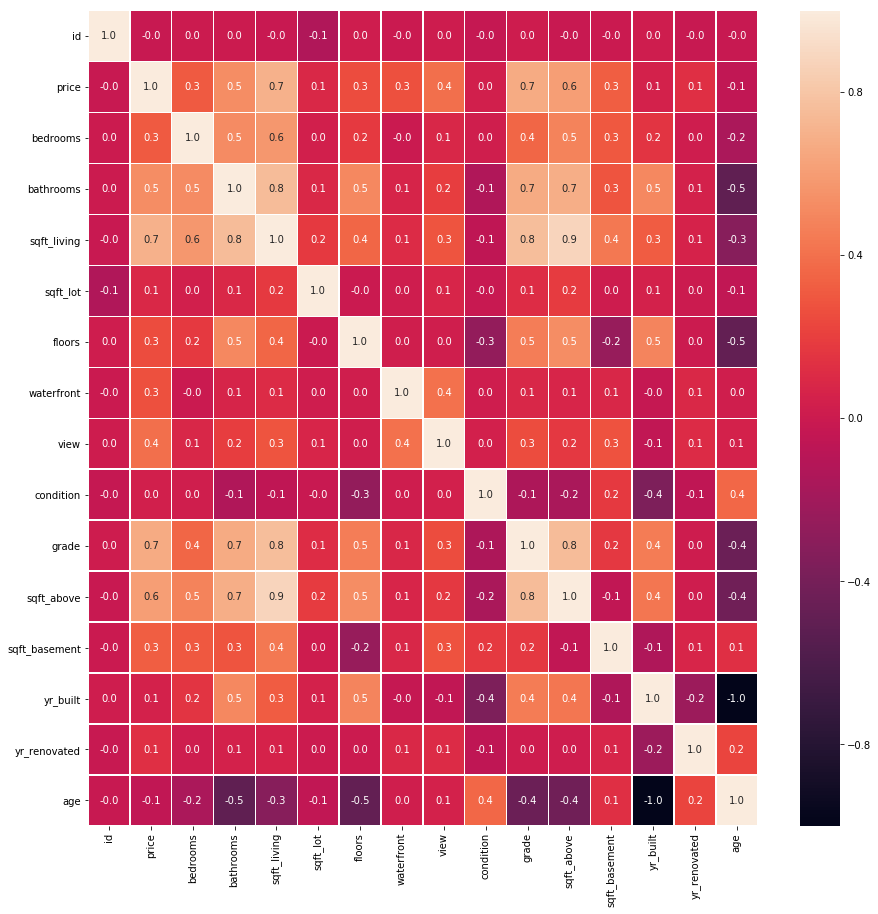

In [8]:
#Correlation Matrix of the "darksky" dataset.
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(houses.corr(), annot= True,linewidths=0.4,fmt='.1f',ax=ax)   
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFA665F860>,
      dtype=object)

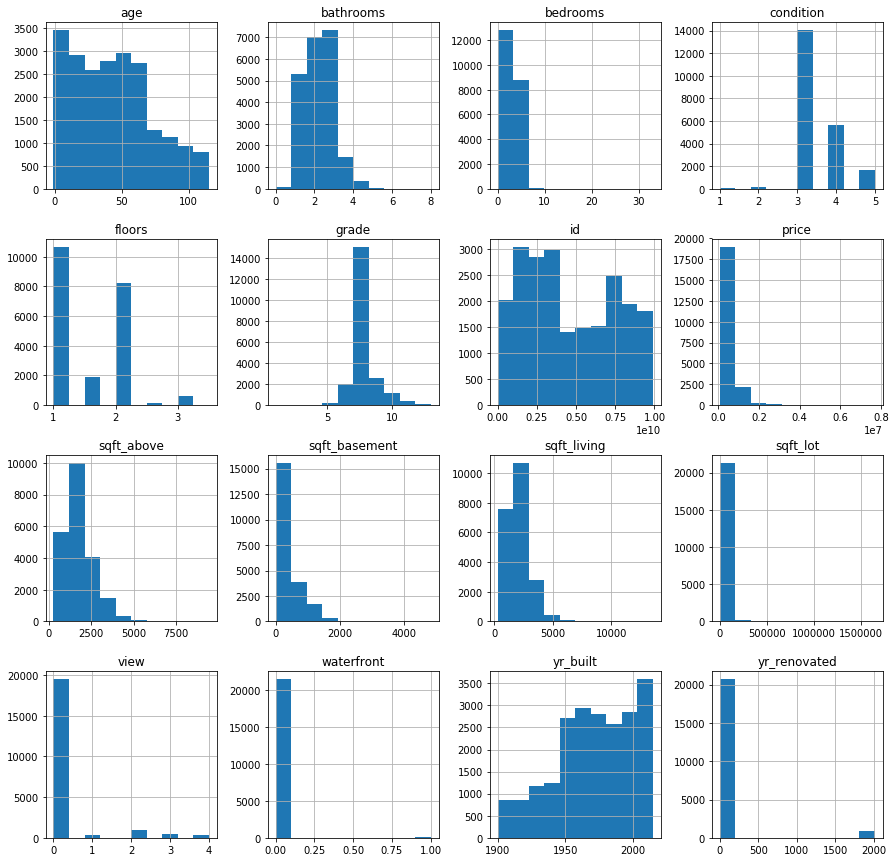

In [9]:
#Histograms of the "darksky" dataset.
rcParams['figure.figsize']=15,15
houses.hist() 

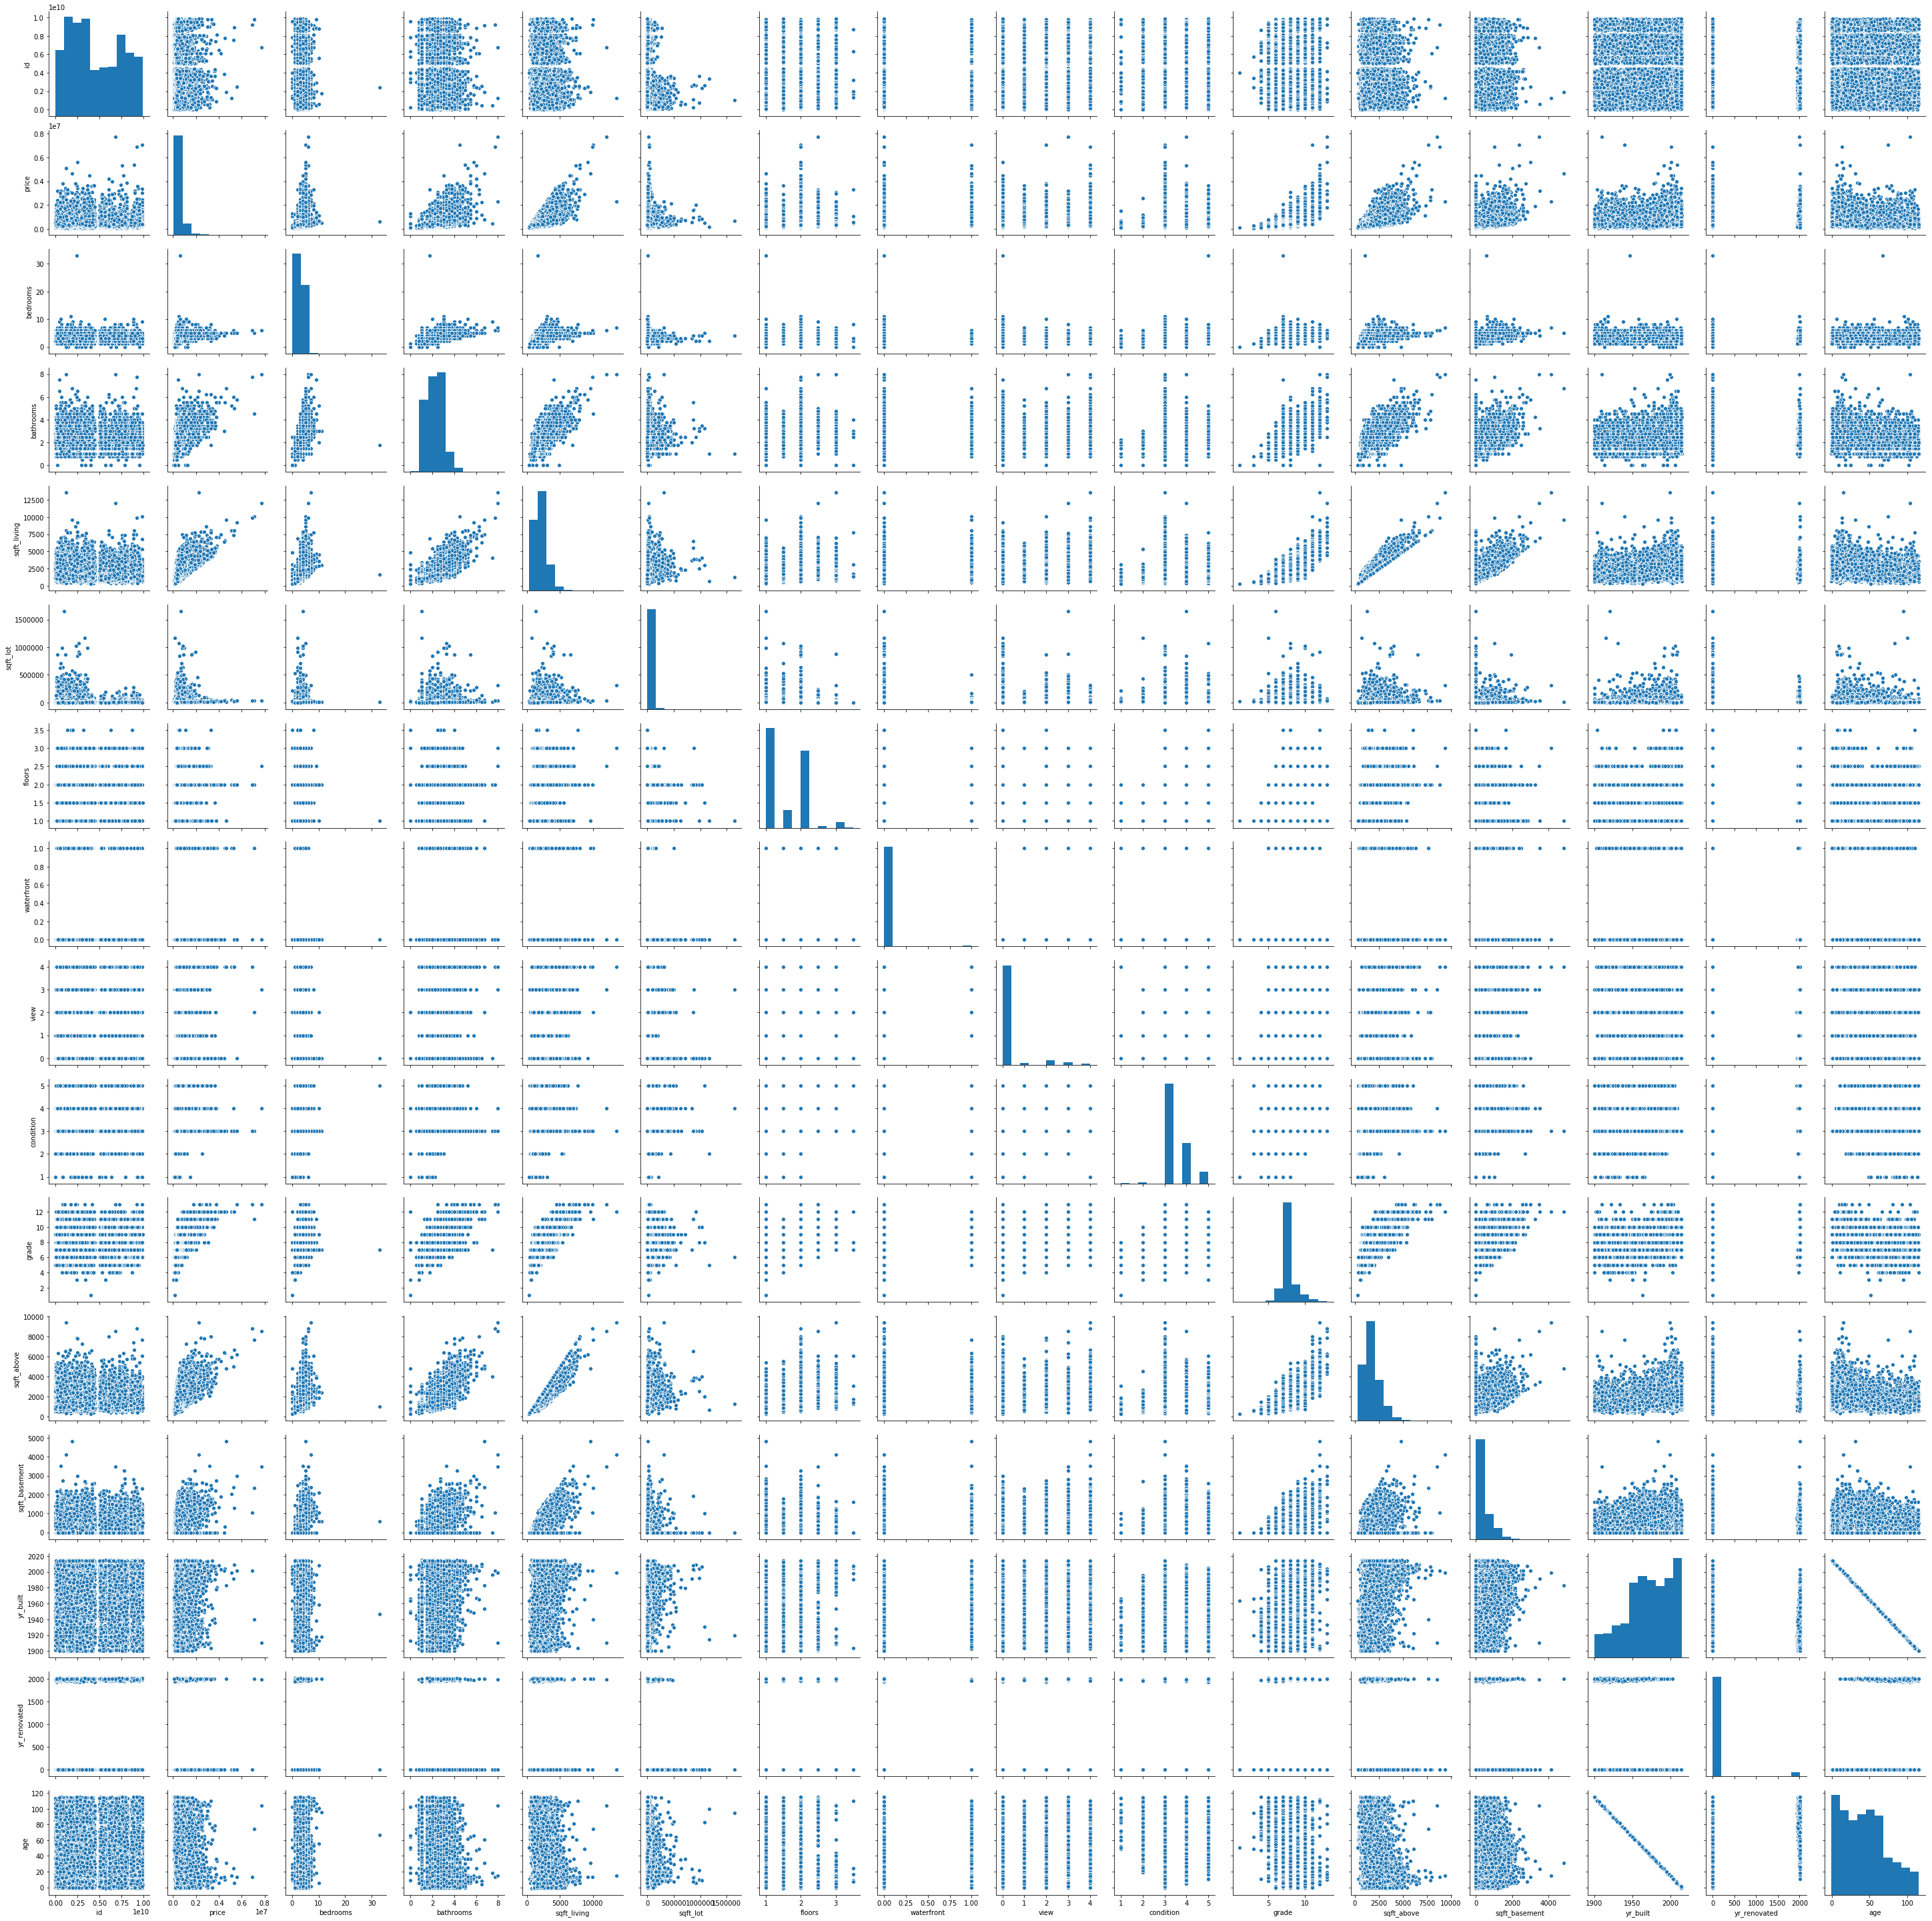

In [10]:
#Paiplots of the "darksky" dataset.
sns.pairplot(houses) 

In [20]:
#Initializing the values of the Dependent and Predictor vairables.
#NOTE#Only Significant Variables are kept in the model and rest were eliminated by using Backward Propogation Elimination Method.
X = houses[['age','bathrooms','bedrooms','condition','floors','grade','sqft_above','sqft_basement','sqft_living','sqft_lot','view','waterfront','yr_built','yr_renovated']].values
y = houses['price'].values

In [21]:
#Splitting the dataset into Train(80%) and Test(20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
#Performing the Multiple Linear Regression.
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
#Checking for the Analysis of Variance Summary of the final model.
X_OLS=sm.add_constant(X_train)
sm.OLS(y_train,X_OLS).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2521.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:14:27   Log-Likelihood:            -2.3713e+05
No. Observations:               17290   AIC:                         4.743e+05
Df Residuals:                   17276   BIC:                         4.744e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.962e+07   7.19e+06     -6.903      0.000   -6.37e+07   -3.55e+07
x1           2.77e+04   3566.722      7.767      0.000    2.07e+04    3.47e+04
x2          4.362e+04   3930.224     11.100      0.000    3.59e+04    5.13e+04
x3         -3.758e+04   2264.048    -16.600      0.000    -4.2e+04   -3.31e+04
x4          1.988e+04   2840.134      6.998      0.000    1.43e+04    2.54e+04
x5          2.702e+04   4207.590      6.421      0.000    1.88e+04    3.53e+04
x6          1.228e+05   2449.441     50.129      0.000    1.18e+05    1.28e+05
x7            57.5391      2.456     23.432      0.000      52.726      62.352
x8            59.4192      3.150     18.862      0.000      53.244      65.594
x9           116.9574      2.574     45.437      0.000     111.912     122.003
x10           -0.2651      0.041     -6.528      0.000      -0.345      -0.186
x11         4.509e+04   2555.004     17.647      0.000    4.01e+04    5.01e+04
x12         5.963e+05   2.04e+04     29.171      0.000    5.56e+05    6.36e+05
x13         2.414e+04   3567.911      6.764      0.000    1.71e+04    3.11e+04
x14            9.3375      4.368      2.138      0.033       0.776      17.899
==============================================================================
Omnibus:                    12918.592   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           935654.266
Skew:                           2.975   Prob(JB):                         0.00
Kurtosis:                      38.544   Cond. No.                     2.44e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.88e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
#Checking for the Coefficient values of the Linear Regression Equation.
coefficient_df = pd.DataFrame(model.coef_,['age','bathrooms','bedrooms','condition','floors','grade','sqft_above','sqft_basement','sqft_living','sqft_lot','view','waterfront','yr_built','yr_renovated'])  
coefficient_df

,0
age,27704.361496
bathrooms,43624.949023
bedrooms,-37583.724967
condition,19875.576249
floors,27018.994249
grade,122787.930030
sqft_above,57.538838
sqft_basement,59.418884
sqft_living,116.957722
sqft_lot,-0.265140


In [26]:
#Checking for the Intercept value of the Linear Regression Equation.
model.intercept_

-49618397.913555145

In [17]:
y_pred = model.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,297000.0,297000.0
1,1578000.0,1578000.0
2,562100.0,562100.0
3,631500.0,631500.0
4,780000.0,780000.0
5,485000.0,485000.0
6,340000.0,340000.0
7,335606.0,335606.0
8,425000.0,425000.0
9,490000.0,490000.0
